In [1]:
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [2]:
# data
acidoCEST_ML = pd.read_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')
acidoCEST_ML = acidoCEST_ML.drop(['Unnamed: 0','ApproT1(sec)','Temp','FILE','Conc(mM)'], axis = 1)
print(acidoCEST_ML.shape)

(36000, 89)


In [31]:
acidoCEST_ML.iloc[20146,:].head(10)

pH                   7.150000
ExpT1(ms)         4005.400000
ExpT2(ms)          217.220000
ExpB1(percent)      71.861000
ExpB0(ppm)           1.925300
ExpB0(Hz)          578.240000
SatPower(uT)         6.000000
SatTime(ms)       4000.000000
-12                  0.971756
-11                  0.978594
Name: 20146, dtype: float64

In [32]:
acidoCEST_ML.iloc[20146,:]

pH                   7.150000
ExpT1(ms)         4005.400000
ExpT2(ms)          217.220000
ExpB1(percent)      71.861000
ExpB0(ppm)           1.925300
                     ...     
8                    0.555091
9                    0.716582
10                   0.821912
11                   0.895050
12                   0.928646
Name: 20146, Length: 89, dtype: float64

In [3]:
Z = acidoCEST_ML.iloc[:,9::]

In [4]:
Z.shape

(36000, 80)

In [5]:
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.2" 2020-01-14; Java(TM) SE Runtime Environment (build 13.0.2+8); Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Users/jcarde20/Library/Python/3.8/lib/python/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/d_/pj93f9nd3k9fq5d2jcwxdbq9n_t54d/T/tmpx6t59vzq
  JVM stdout: /var/folders/d_/pj93f9nd3k9fq5d2jcwxdbq9n_t54d/T/tmpx6t59vzq/h2o_jcarde20_started_from_python.out
  JVM stderr: /var/folders/d_/pj93f9nd3k9fq5d2jcwxdbq9n_t54d/T/tmpx6t59vzq/h2o_jcarde20_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Phoenix
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,4 months and 4 days !!!
H2O_cluster_name:,H2O_from_python_jcarde20_gu5aay
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
data = h2o.H2OFrame(Z)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
# Split the dataset into a train and valid set:
train, valid = data.split_frame(ratios=[.8], seed=1234)


In [8]:
train.shape

(28921, 80)

In [9]:
valid.shape

(7079, 80)

In [33]:
glrm_model = H2OGeneralizedLowRankEstimator(k=5,
                                            loss="quadratic",
                                            gamma_x=0.5,
                                            gamma_y=0.5,
                                            max_iterations=700,
                                            recover_svd=True,
                                            init="SVD",
                                            transform="standardize")
glrm_model.train(training_frame=train)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


In [34]:
glrm_model

Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1612296025130_3


Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,331.0,0.000087,100060.388695




ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 100060.38862663918
Misclassification Error (Categorical): 0.0

Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2021-02-02 13:29:08,0.453 sec,0.0,0.666667,100155.784888
1,,2021-02-02 13:29:08,0.520 sec,1.0,0.444444,100155.784888
2,,2021-02-02 13:29:08,0.586 sec,2.0,0.222222,100155.784888
3,,2021-02-02 13:29:08,0.658 sec,3.0,0.074074,100155.784888
4,,2021-02-02 13:29:09,0.726 sec,4.0,0.077778,100142.599394
5,,2021-02-02 13:29:09,0.784 sec,5.0,0.051852,100142.599394
6,,2021-02-02 13:29:09,0.846 sec,6.0,0.054444,100135.482474
7,,2021-02-02 13:29:09,0.916 sec,7.0,0.057167,100129.663577
8,,2021-02-02 13:29:09,0.982 sec,8.0,0.060025,100124.331862
9,,2021-02-02 13:29:09,1.053 sec,9.0,0.063026,100119.296982



See the whole table with table.as_data_frame()


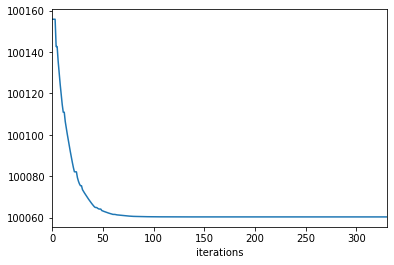

In [35]:
glrm_model.scoring_history().set_index('iterations')['objective'].plot()

In [36]:
import plotly.express as px

In [39]:
len(Z.columns.tolist())

80

In [40]:
Y = glrm_model._model_json["output"]['archetypes'].as_data_frame()
X = Z @ np.linalg.pinv(Y.iloc[:,1::].values)  

In [42]:
Y

,,11,10,9,6,3,275,25,225,2,...,7,72,74,76,78,8,9,10,11,12
0,Arch1,-3.162872,-3.282764,-3.369027,-3.638585,-3.937046,-3.992844,-4.009612,-4.018314,-4.018079,...,-4.176404,-4.162331,-4.136729,-4.116214,-4.102834,-4.080818,-3.955108,-3.755105,-3.559136,-3.388160
1,Arch2,2.832844,2.863677,2.989573,3.176539,3.346766,3.279275,3.248637,3.222313,3.225971,...,-2.121442,-1.933171,-1.725829,-1.459645,-1.117770,-0.797250,0.372893,1.241099,1.682362,1.984608
2,Arch3,4.471310,4.268538,4.028852,3.284265,1.698403,1.250171,0.996642,0.758289,0.523593,...,1.359213,1.690192,2.016558,2.313307,2.581540,2.840954,3.498629,3.995522,4.372776,4.637970
3,Arch4,-0.956380,-0.932442,-0.900702,-0.725794,0.053517,0.291011,0.440763,0.630941,0.778609,...,-0.464047,-0.525404,-0.579636,-0.586926,-0.566548,-0.558624,-0.549485,-0.762270,-0.836267,-0.967019
4,Arch5,-2.148030,-1.836745,-1.449224,-0.642459,0.811924,1.219345,1.442812,1.604843,1.744979,...,-0.159937,-0.007058,0.109297,0.119802,-0.002016,-0.209182,-0.946947,-1.406169,-1.717456,-1.967521


In [46]:
x= Y.iloc[2,1::]
y= Y.iloc[1,1::]

df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['color']=  [ float(q) for q in acidoCEST_ML.iloc[:,9::].columns.tolist() ]
df['h']= ['sat @ ' + str(q) + 'ppm' for q in Z.columns ]
df['size'] = 12


fig = px.scatter(df ,x='x',y='y',color='color', hover_data='h', size='size' )
fig.write_html("./CEST_projections_Y_freqs.html")

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial import distance_matrix

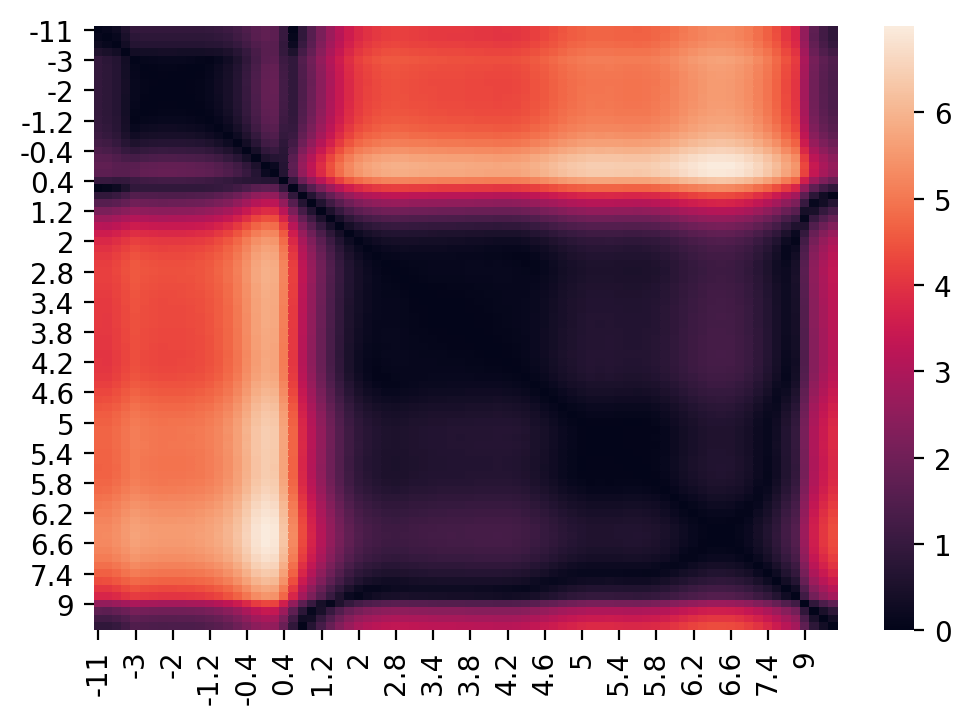

In [18]:
f, ax = plt.subplots(dpi = 200)

w = acidoCEST_ML.iloc[:,9::].columns
D = pd.DataFrame( distance_matrix( Y.iloc[:,1::].T, Y.iloc[:,1::].T), index = w, columns= w)


sns.heatmap(D,ax=ax)

In [24]:
fig = px.imshow(D)
fig.show()
fig.write_html("./HEAT.html")

In [ ]:
df = pd.DataFrame()
df['x'] =  X[0]
df['y'] =  X[1]
df['size'] = 12
df['sample'] = np.arange(df.x.shape[0])


fig = px.scatter(df ,x='x',y='y', hover_name='sample')
fig.write_html("./CEST_projections_X_samples.html")

In [ ]:
from h2o.estimators import H2OKMeansEstimator

In [ ]:
# Split the dataset into a train and valid set:
train2, valid2 = h2o.H2OFrame(X).split_frame(ratios=[.8], seed=1234)

# Build and train the model:
X_kmeans = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
X_kmeans.train(
                  training_frame=train2,
                  validation_frame=valid2)

# Eval performance:
perf = X_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = X_kmeans.predict(valid2)

In [ ]:
perf

In [ ]:
# Split the dataset into a train and valid set:
train, valid = iris.split_frame(ratios=[.8], seed=1234)

# Build and train the model:
iris_kmeans = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
iris_kmeans.train(x=predictors,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = iris_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = iris_kmeans.predict(valid)